<a href="https://colab.research.google.com/github/pawel-kowal/studies/blob/main/python_w_praktyce/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import os
from matplotlib import pyplot as plt

print(os.getcwd())

/content


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/PYTHON SGGW'

/content/drive/MyDrive/PYTHON SGGW


In [4]:
print(os.getcwd())
print(os.listdir())

face_cascade = cv2.CascadeClassifier('./classifiers/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./classifiers/haarcascades/haarcascade_eye.xml')

/content/drive/MyDrive/PYTHON SGGW
['lew.jpg', 'zyrafa.jpg', 'kangur.jpg', 'małpa.jpg', 'opencv_get_set_pixel_value.ipynb', 'EP_3.xlsx', 'ekonometria_przestrzenna_3.ipynb', 'learn.ipynb', 'opencv_load_display_save_image.ipynb', 'Untitled0.ipynb', 'classifiers', 'face_recognition.ipynb', 'robert.jpg', 'IMG_20230514_120707.jpg', 'przykladowe_dane', 'Zadanie 1 A.png', 'Zadanie 1 B.png', 'Zadanie 1 C.png', 'Zadanie 2 A.png', 'Zadanie 2 B.png', 'Zadanie 2 C.png', 'opencv_create_chessboard.ipynb', 'Zadanie 4.png', 'Zadanie 5.png', 'Zadanie 6.png', 'zjazd_1405.ipynb', 'Zadanie 7.png', 'Zadanie 8.png', 'Untitled1.ipynb']


In [72]:
image = cv2.imread("./classifiers/ai_face_01.jpg")

True

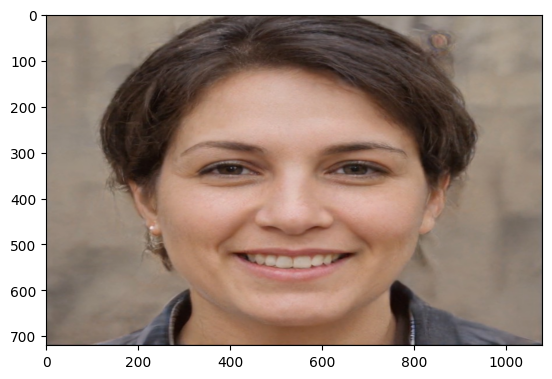

In [73]:
image = cv2.resize(image,(1080,720))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
cv2.imwrite('Zadanie 9 A.png', image)

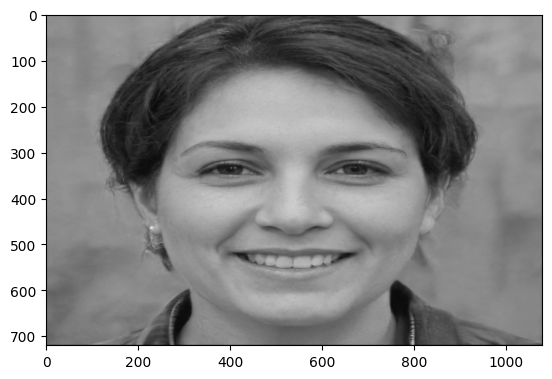

In [76]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))

In [74]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5, minSize=(120,120))
for (x,y,w,h) in faces:
  # cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,0),2)
  roi_gray=image[y:y+h, x:x+w]

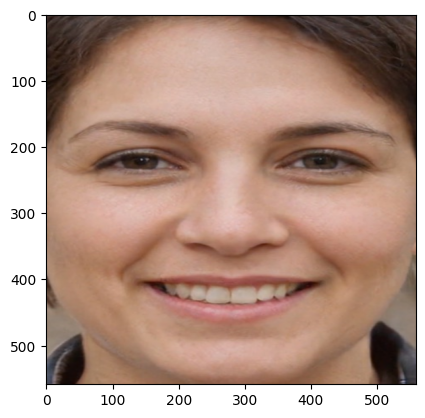

In [75]:
plt.imshow(cv2.cvtColor(roi_gray, cv2.COLOR_BGR2RGB))

### Rozmazana twarz

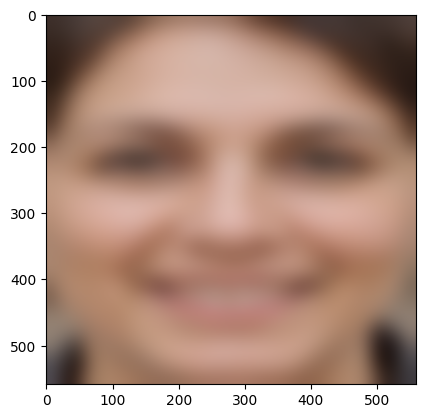

In [77]:
blurred_image = cv2.GaussianBlur(roi_gray, (99, 99), 0)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))

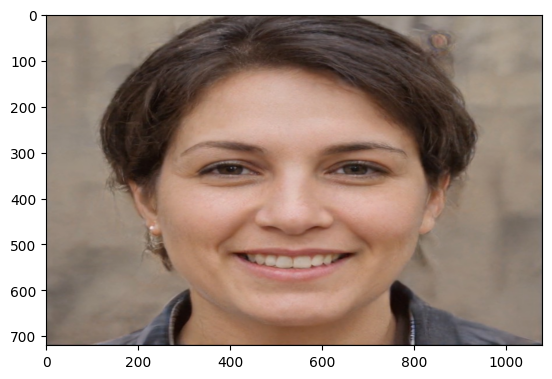

In [78]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

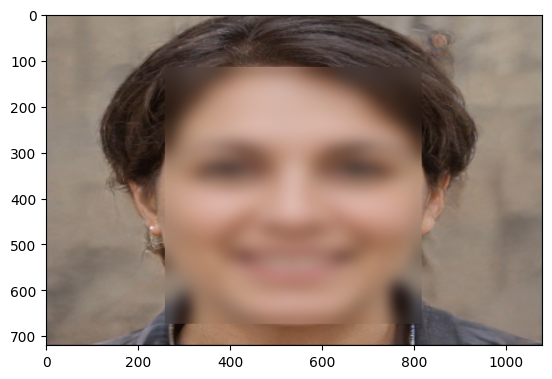

In [80]:
image[y:y+h, x:x+w] = blurred_image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [81]:
cv2.imwrite('Zadanie 9 b.png', image)

True

### Rozmazane tło


In [82]:
image = cv2.imread("./classifiers/ai_face_01.jpg")

True

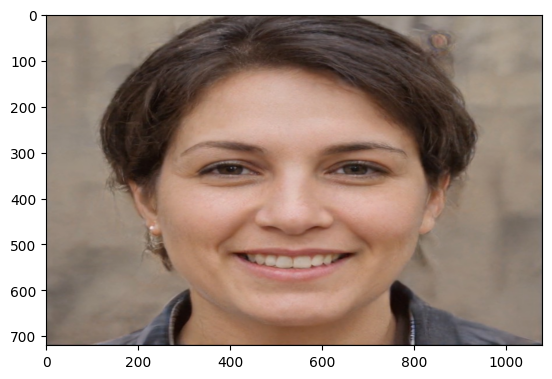

In [83]:
image = cv2.resize(image,(1080,720))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
cv2.imwrite('Zadanie 9 A.png', image)

In [84]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5, minSize=(120,120))
for (x,y,w,h) in faces:
  # cv2.rectangle(image, (x,y), (x+w,y+h), (0,0,0),2)
  roi_gray=image[y:y+h, x:x+w]

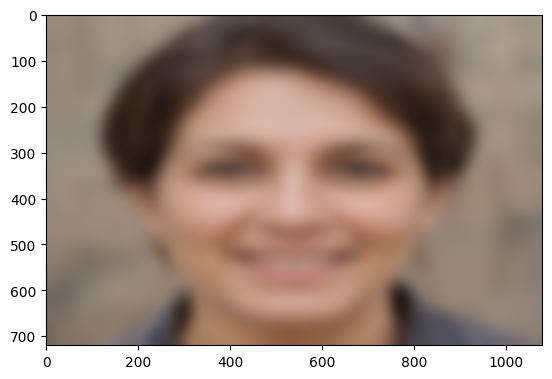

In [91]:
blurred_image = cv2.GaussianBlur(image, (99, 99), 0)
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))

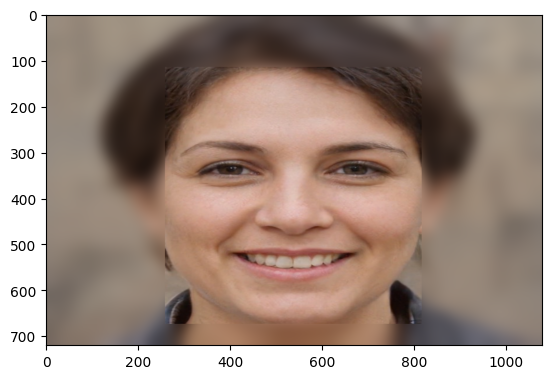

In [92]:
blurred_image[y:y+h, x:x+w] = roi_gray
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))

In [94]:
cv2.imwrite('Zadanie 9 C.png', blurred_image)

True

### Blurowanie oczu

True

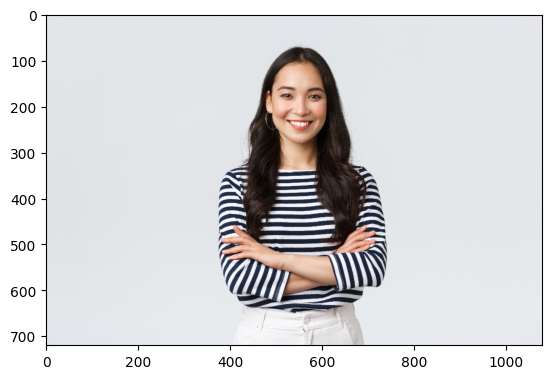

In [170]:
image = cv2.imread("./classifiers/asian_woman.jpg")
image = cv2.resize(image,(1080,720))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
cv2.imwrite('Zadanie 10 A.png', image)

In [171]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [172]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5, minSize=(120,120))
for (x,y,w,h) in faces:
  # cv2.rectangle(image, (x,y), (x+w,y+h), (255,0,0),2)
  roi_gray=image[y:y+h, x:x+w]
  eyes = eye_cascade.detectMultiScale(roi_gray, 1.03, 5, minSize=(40,40))
  for(ex,ey,ew,eh) in eyes:
    roi_eye = image[ey:ey+eh,ex:ex+ew]
    # cv2.rectangle(image, (x+ex,y+ey), (x+ex+ew,y+ey+eh), (0,255,0),2)

left_eye = eyes[0]
right_eye = eyes[1]
print(f"Left eye: {left_eye}")
print(f"Right eye: {right_eye}")

Left eye: [33 42 49 49]
Right eye: [92 47 46 46]


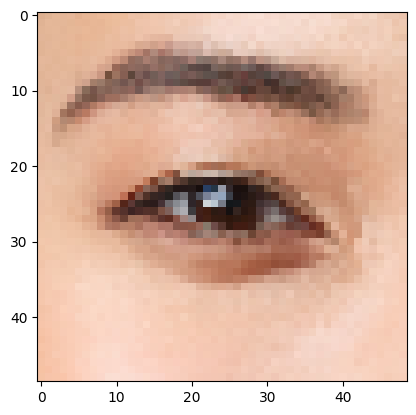

In [173]:
plt.imshow(cv2.cvtColor(roi_gray[42:42+49,33:33+49], cv2.COLOR_BGR2RGB))

In [174]:
l_x, l_y, l_w, l_h = left_eye
r_x, r_y, r_w, r_h = right_eye

In [175]:
left_eye = roi_gray[l_y:l_y+l_h, l_x:l_x+l_w]
right_eye = roi_gray[r_y:r_y+r_h, r_x:r_x+r_w]

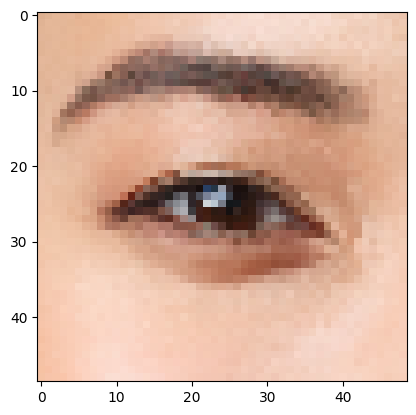

In [176]:
plt.imshow(cv2.cvtColor(left_eye, cv2.COLOR_BGR2RGB))

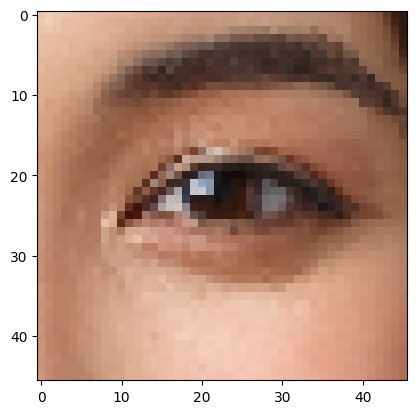

In [177]:
plt.imshow(cv2.cvtColor(right_eye, cv2.COLOR_BGR2RGB))

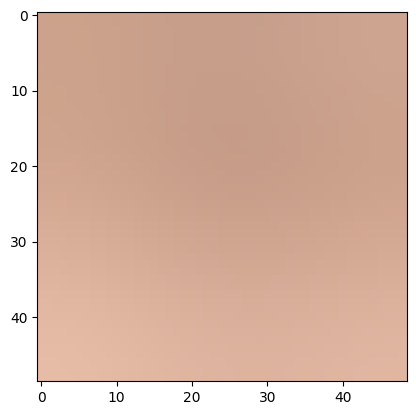

In [178]:
blurred_image_left = cv2.GaussianBlur(left_eye, (99, 99), 0)
plt.imshow(cv2.cvtColor(blurred_image_left, cv2.COLOR_BGR2RGB))

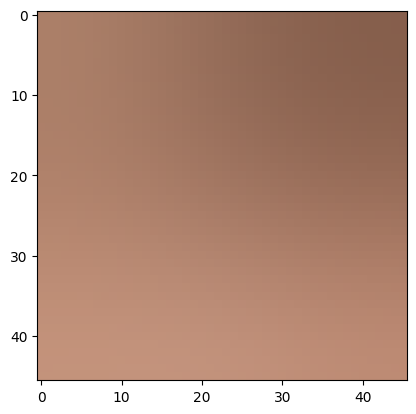

In [182]:
blurred_image_right = cv2.GaussianBlur(right_eye, (99, 99), 0)
plt.imshow(cv2.cvtColor(blurred_image_right, cv2.COLOR_BGR2RGB))

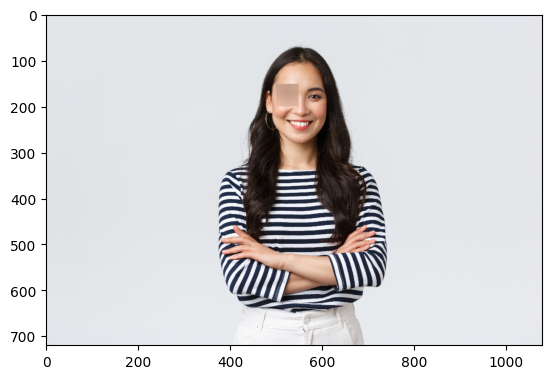

In [180]:
roi_gray[l_y:l_y+l_h, l_x:l_x+l_w] = blurred_image_left
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

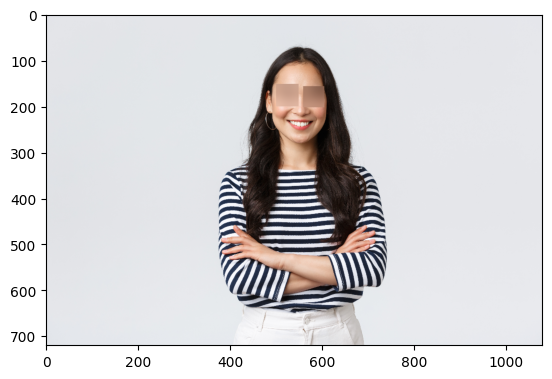

In [183]:
roi_gray[r_y:r_y+r_h, r_x:r_x+r_w] = blurred_image_right
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

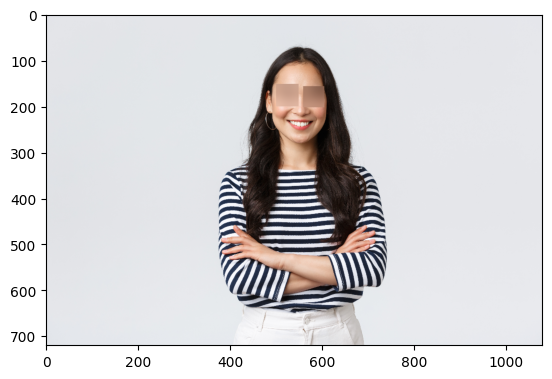

In [184]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [185]:
cv2.imwrite('Zadanie 10 B.png', image)

True

### Zasłanianie oczu

True

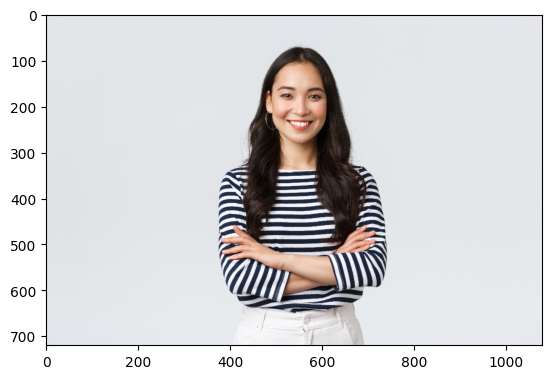

In [241]:
image = cv2.imread("./classifiers/asian_woman.jpg")
image = cv2.resize(image,(1080,720))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
cv2.imwrite('Zadanie 11 A.png', image)

In [242]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [243]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5, minSize=(120,120))
for (x,y,w,h) in faces:
  # cv2.rectangle(image, (x,y), (x+w,y+h), (255,0,0),2)
  roi_gray=image[y:y+h, x:x+w]
  eyes = eye_cascade.detectMultiScale(roi_gray, 1.03, 5, minSize=(40,40))

  for(ex,ey,ew,eh) in eyes:
    roi_eye = image[ey:ey+eh,ex:ex+ew]
    # cv2.rectangle(image, (x+ex,y+ey), (x+ex+ew,y+ey+eh), (0,255,0),2)

In [244]:
print(eyes)

[[33 42 49 49]
 [92 47 46 46]]


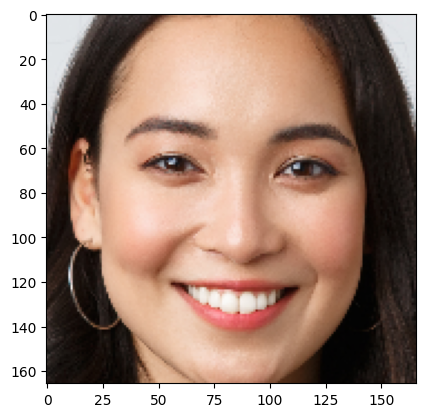

In [245]:
plt.imshow(cv2.cvtColor(roi_gray, cv2.COLOR_BGR2RGB))

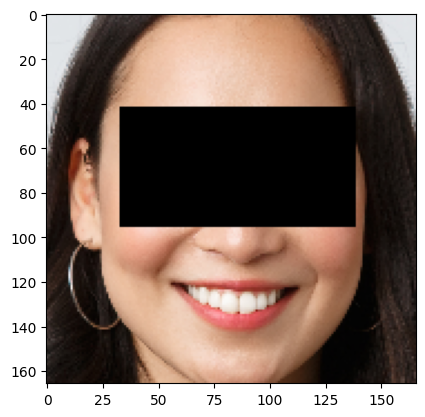

In [247]:
cv2.rectangle(roi_gray, (33,42), (33+46+49+10,46+49), (0,0,0),-1)
plt.imshow(cv2.cvtColor(roi_gray, cv2.COLOR_BGR2RGB))

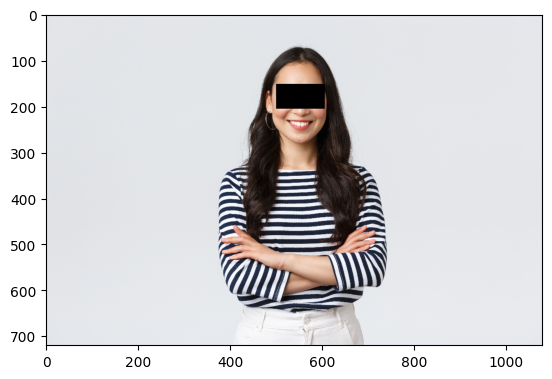

In [248]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [249]:
cv2.imwrite('Zadanie 11 B.png', image)

True